In [1]:
import snap
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Setup
erdosRenyi = None
smallWorld = None
collabNet = None

In [3]:
# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!
    Graph = nx.Graph()
    Graph.add_nodes_from(range(0, N))
    node_list = list(Graph)
    n_edges = 0
    while n_edges < E:
        node1 = random.choice(node_list)
        node2 = random.choice(node_list)
        if not(node1 == node2 or Graph.has_edge(node1, node2)):
            Graph.add_edge(node1, node2)
            n_edges += 1
    #############################################################################
    return Graph

In [4]:
# checking above function
g_er = genErdosRenyi()
nx.info(g_er)

'Name: \nType: Graph\nNumber of nodes: 5242\nNumber of edges: 14484\nAverage degree:   5.5261'

In [5]:
def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    # TODO: Your code here!
    Graph = nx.Graph()
    Graph.add_nodes_from(range(0, N))
    node_list = list(Graph)
    for i in node_list:
        if not(Graph.has_edge(i, i + 1)) and (i + 1 < N):
            Graph.add_edge(i, i + 1)
        elif not(Graph.has_edge(i, i + 1)) and (i + 1 == N):
            Graph.add_edge(i, 0)
    ############################################################################
    return Graph

In [6]:
g_cir = genCircle()
nx.info(g_cir)

'Name: \nType: Graph\nNumber of nodes: 5242\nNumber of edges: 5242\nAverage degree:   2.0000'

In [7]:
def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    # TODO: Your code here!
    node_list = list(Graph)
    for i in node_list:
        if not(Graph.has_edge(i, i + 2)) and (i < (N - 2)):
            Graph.add_edge(i, i + 2)
        if not(Graph.has_edge(i, i + 2)) and (i == (N - 2)):
            Graph.add_edge(i, 0)
        if not(Graph.has_edge(i, i + 2)) and (i == (N - 1)):
            Graph.add_edge(i, 1)
    ############################################################################
    return Graph

In [8]:
g_nbnb = connectNbrOfNbr(g_cir)
#nx.draw_circular(g_nbnb, with_labels=True, font_weight='bold')
nx.info(g_nbnb)

'Name: \nType: Graph\nNumber of nodes: 5242\nNumber of edges: 10484\nAverage degree:   4.0000'

In [9]:
def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    # TODO: Your code here!
    node_list = list(Graph)
    n_edges = 0
    while n_edges < M:
        node1 = random.choice(node_list)
        node2 = random.choice(node_list)
        if not(node1 == node2 or Graph.has_edge(node1, node2)):
            Graph.add_edge(node1, node2)
            n_edges += 1
    ############################################################################
    return Graph

In [10]:
def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph

In [11]:
def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed

    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    Graph = nx.read_edgelist("CA-GrQc.txt",create_using=nx.DiGraph(), nodetype = int)
    Graph = Graph.to_undirected()
    node_list = list(Graph) 
    for i in node_list:
        if Graph.has_edge(i, i):
            Graph.remove_edge(i, i)
    ############################################################################
    return Graph

In [12]:
g_colab = loadCollabNet("")
nx.info(g_colab)

'Name: \nType: Graph\nNumber of nodes: 5242\nNumber of edges: 14484\nAverage degree:   5.5261'

In [13]:
g_colab.number_of_selfloops()

0

In [14]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X_temp = [degree for (node, degree) in Graph.degree()]
    X = [] 
    [X.append(i) for i in X_temp if i not in X]
    X = sorted(X)
    
    Y_temp = nx.degree_histogram(Graph)
    Y = []
    [Y.append(i) for i in Y_temp if i != 0]
    ############################################################################
    return X, Y

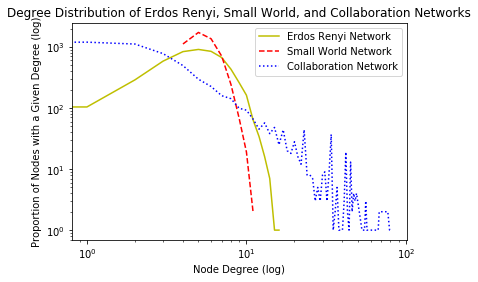

In [15]:
def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()


# Execute code for Q1.1
Q1_1()

In [16]:
def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: local clustering coeffient of Node
    """
    ############################################################################
    # TODO: Your code here!
    C = 0.0
    neighbors = [n for n in Graph.neighbors(Node)]
    if len(neighbors) < 2: 
        return 0.0
    edges = 0
    for ngb1 in neighbors:
        for ngb2 in neighbors:
            if ngb1 in Graph[ngb2]: 
                edges += 0.5
    C = (2.0 * edges) / (len(neighbors) * (len(neighbors) - 1))
    ############################################################################
    return C

In [17]:
def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: clustering coeffient of Graph
    """
    ############################################################################
    # TODO: Your code here! If you filled out calcClusteringCoefficientSingleNode,
    #       you'll probably want to call it in a loop here
    C = 0.0
    clustering_sum = 0
    for node in Graph:
        clustering_sum += calcClusteringCoefficientSingleNode(node, Graph)
    C = clustering_sum/Graph.number_of_nodes()
    ############################################################################
    return C

In [18]:
def Q1_2():
    """
    Code for Q1.2
    """
    C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = calcClusteringCoefficient(smallWorld)
    C_collabNet = calcClusteringCoefficient(collabNet)

    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)

# Execute code for Q1.2
Q1_2()

Clustering Coefficient for Erdos Renyi Network: 0.000858
Clustering Coefficient for Small World Network: 0.283156
Clustering Coefficient for Collaboration Network: 0.529636
